# Part 1

## Maximizing the Reward


#### Thomson Sampling

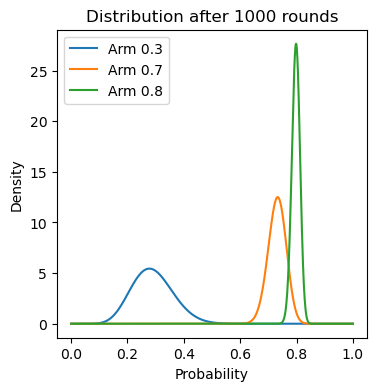

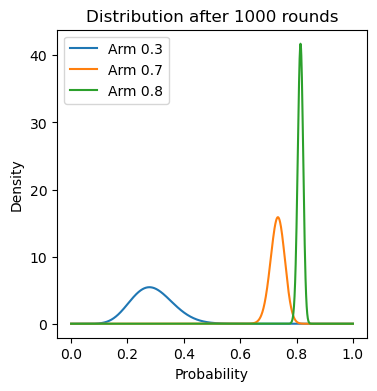

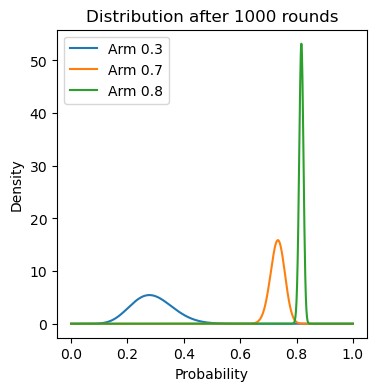

Epsilon-Greedy Algorithm:
Final Accumulated Reward: 767.0
Final Accumulated Regret: 37.100000000000016
Number of Times Each Arm has been Pulled: [ 36. 191. 773.]

Upper Confident Bound Algorithm:
Final Accumulated Reward: 817.0
Final Accumulated Regret: 11.70000000000001
Number of Times Each Arm has been Pulled: [  0. 117. 883.]

Thompson Sampling Algorithm:
Final Accumulated Reward: 822.0
Final Accumulated Regret: 0.0
Number of Times Each Arm has been Pulled: [   0.    0. 1000.]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

class Bandit:
    def __init__(self, p):
        self.p = p  # reward probability
        self.a = 1  # alpha parameter of the Beta distribution
        self.b = 1  # beta parameter of the Beta distribution
        self.N = 0  # number of trials

    def pull(self):
        # simulate pulling the slot machine lever
        return np.random.random() < self.p

    def sample(self):
        # sample from the Beta distribution
        return np.random.beta(self.a, self.b)

    def update(self, x):
        # update the parameters of the Beta distribution
        self.a += x
        self.b += 1 - x
        self.N += 1

def epsilon_greedy(bandits, epsilon, N):
    rewards = np.zeros(N)
    regrets = np.zeros(N)
    pulls = np.zeros(len(bandits))

    for i in range(N):
        # epsilon-greedy algorithm
        if np.random.random() < epsilon:
            j = np.random.choice(len(bandits))
        else:
            j = np.argmax([b.sample() for b in bandits])

        x = bandits[j].pull()
        bandits[j].update(x)

        rewards[i] = x
        regrets[i] = max([b.p for b in bandits]) - bandits[j].p
        pulls[j] += 1

    return rewards, regrets, pulls

def upper_confident_bound(bandits, C, N):
    rewards = np.zeros(N)
    regrets = np.zeros(N)
    pulls = np.zeros(len(bandits))

    for i in range(N):
        # upper confident bound algorithm
        j = np.argmax([b.sample() + C * np.sqrt(np.log(i+1) / (b.N + 1e-6)) for b in bandits])

        x = bandits[j].pull()
        bandits[j].update(x)

        rewards[i] = x
        regrets[i] = max([b.p for b in bandits]) - bandits[j].p
        pulls[j] += 1

    return rewards, regrets, pulls

def thompson_sampling(bandits, N):
    rewards = np.zeros(N)
    regrets = np.zeros(N)
    pulls = np.zeros(len(bandits))

    for i in range(N):
        # Thompson sampling algorithm
        j = np.argmax([b.sample() for b in bandits])

        x = bandits[j].pull()
        bandits[j].update(x)

        rewards[i] = x
        regrets[i] = max([b.p for b in bandits]) - bandits[j].p
        pulls[j] += 1

    return rewards, regrets, pulls

def plot_distribution(bandits, N):
    x = np.linspace(0, 1, 1000)
    for b in bandits:
        y = beta.pdf(x, b.a, b.b)
        plt.plot(x, y, label=f"Arm {b.p}")
    plt.legend()
    plt.xlabel("Probability")
    plt.ylabel("Density")
    plt.title(f"Distribution after {N} rounds")
    plt.gcf().set_size_inches(4, 4)
    plt.show() 

if __name__ == '__main__':
    # Set the probability of winning for the three slot machines
    p1, p2, p3 = 0.3, 0.7, 0.8

    # Create three bandits
    bandits = [Bandit(p1), Bandit(p2), Bandit(p3)]

    # Run epsilon-greedy algorithm
    epsilon = 0.1
    rewards_eps, regrets_eps, pulls_eps = epsilon_greedy(bandits, epsilon, 1000)

    # Plot the distribution after 1000 rounds for epsilon-greedy
    plot_distribution(bandits, 1000)
    
    # Run upper confident bound algorithm
    C = 0.5
    rewards_ucb, regrets_ucb, pulls_ucb = upper_confident_bound(bandits, C, 1000)


    # Plot the distribution after 1000 rounds for upper confident bound
    plot_distribution(bandits, 1000)
    
    
    # Run Thompson sampling algorithm
    rewards_ts, regrets_ts, pulls_ts = thompson_sampling(bandits, 1000)
    
    # Plot the distribution after 1000 rounds for Thompson sampling
    plot_distribution(bandits, 1000)


    # Report the results
    print("Epsilon-Greedy Algorithm:")
    print("Final Accumulated Reward:", np.sum(rewards_eps))
    print("Final Accumulated Regret:", np.sum(regrets_eps))
    print("Number of Times Each Arm has been Pulled:", pulls_eps)

    print("\nUpper Confident Bound Algorithm:")
    print("Final Accumulated Reward:", np.sum(rewards_ucb))
    print("Final Accumulated Regret:", np.sum(regrets_ucb))
    print("Number of Times Each Arm has been Pulled:", pulls_ucb)

    print("\nThompson Sampling Algorithm:")
    print("Final Accumulated Reward:", np.sum(rewards_ts))
    print("Final Accumulated Regret:", np.sum(regrets_ts))
    print("Number of Times Each Arm has been Pulled:", pulls_ts)


--- 

# Part 2

## Hyperparameter Selection

#### UCB 調整參數 c = 0.7, 0.9, 0.1的結果

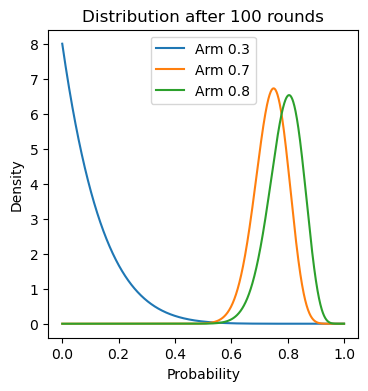

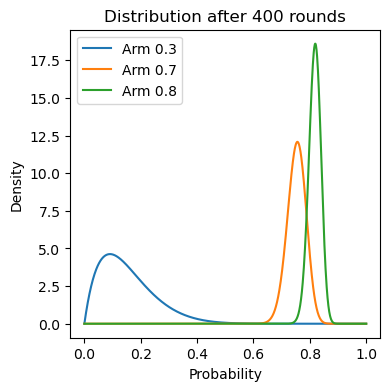

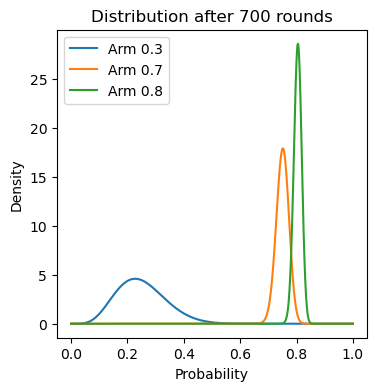

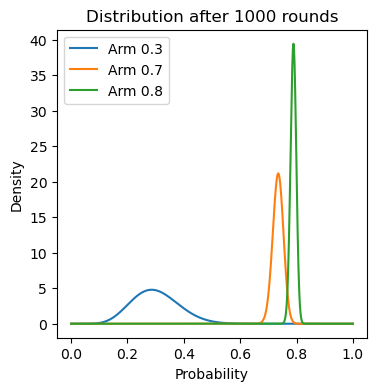

In [8]:
# Set the probability of winning for the three slot machines
p1, p2, p3 = 0.3, 0.7, 0.8

# Create three bandits
bandits = [Bandit(p1), Bandit(p2), Bandit(p3)]
# Run upper confident bound algorithm
C = 0.7
rewards_ucb, regrets_ucb, pulls_ucb = upper_confident_bound(bandits, C, 100)
# Plot the distribution after 1000 rounds for upper confident bound
plot_distribution(bandits, 100)
rewards_ucb, regrets_ucb, pulls_ucb = upper_confident_bound(bandits, C, 400)
# Plot the distribution after 1000 rounds for upper confident bound
plot_distribution(bandits, 400)
rewards_ucb, regrets_ucb, pulls_ucb = upper_confident_bound(bandits, C, 700)
# Plot the distribution after 1000 rounds for upper confident bound
plot_distribution(bandits, 700)
rewards_ucb, regrets_ucb, pulls_ucb = upper_confident_bound(bandits, C, 1000)
# Plot the distribution after 1000 rounds for upper confident bound
plot_distribution(bandits, 1000)

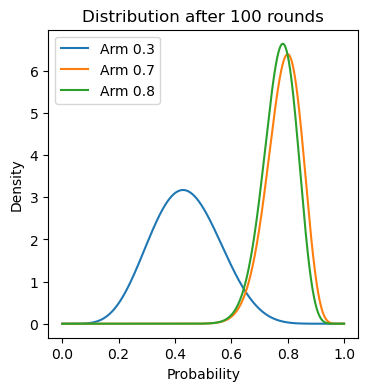

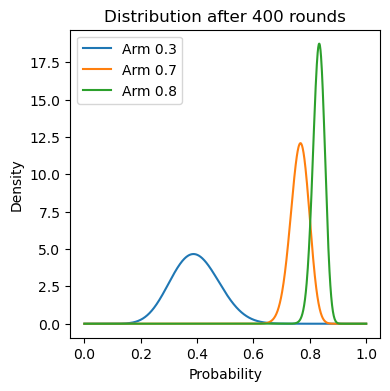

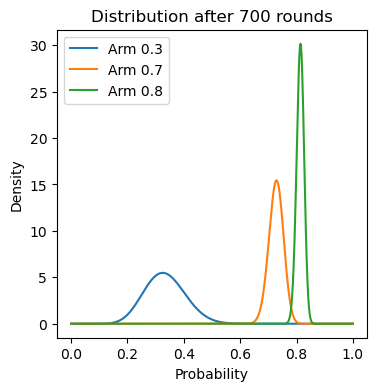

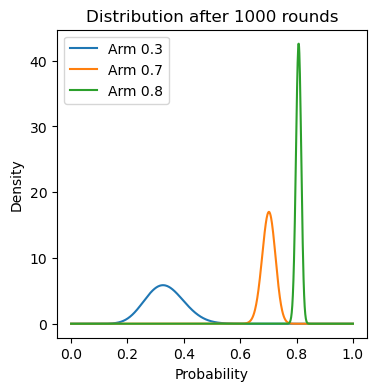

In [9]:
# Set the probability of winning for the three slot machines
p1, p2, p3 = 0.3, 0.7, 0.8

# Create three bandits
bandits = [Bandit(p1), Bandit(p2), Bandit(p3)]
# Run upper confident bound algorithm
C = 0.9
rewards_ucb, regrets_ucb, pulls_ucb = upper_confident_bound(bandits, C, 100)
# Plot the distribution after 1000 rounds for upper confident bound
plot_distribution(bandits, 100)
rewards_ucb, regrets_ucb, pulls_ucb = upper_confident_bound(bandits, C, 400)
# Plot the distribution after 1000 rounds for upper confident bound
plot_distribution(bandits, 400)
rewards_ucb, regrets_ucb, pulls_ucb = upper_confident_bound(bandits, C, 700)
# Plot the distribution after 1000 rounds for upper confident bound
plot_distribution(bandits, 700)
rewards_ucb, regrets_ucb, pulls_ucb = upper_confident_bound(bandits, C, 1000)
# Plot the distribution after 1000 rounds for upper confident bound
plot_distribution(bandits, 1000)

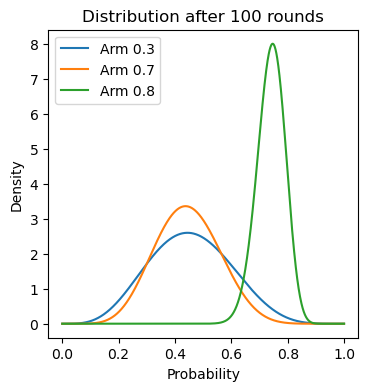

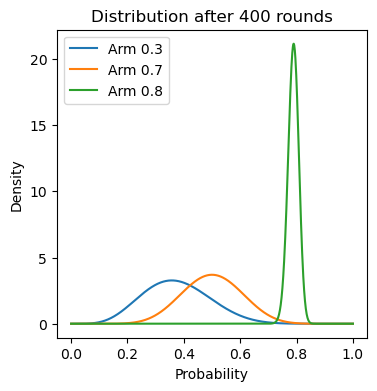

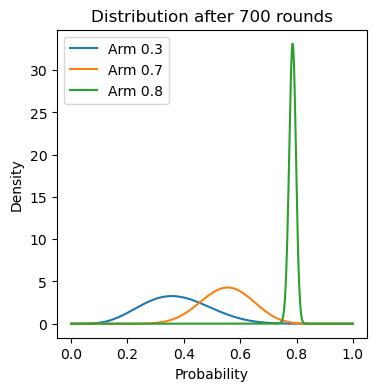

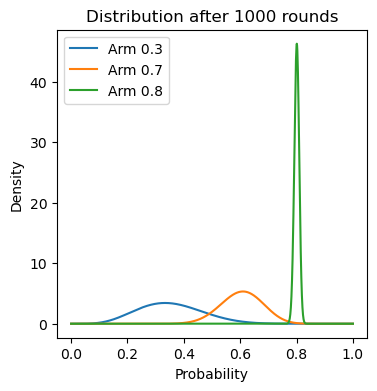

In [11]:
# Set the probability of winning for the three slot machines
p1, p2, p3 = 0.3, 0.7, 0.8

# Create three bandits
bandits = [Bandit(p1), Bandit(p2), Bandit(p3)]
# Run upper confident bound algorithm
C = 0.1
rewards_ucb, regrets_ucb, pulls_ucb = upper_confident_bound(bandits, C, 100)
# Plot the distribution after 1000 rounds for upper confident bound
plot_distribution(bandits, 100)
rewards_ucb, regrets_ucb, pulls_ucb = upper_confident_bound(bandits, C, 400)
# Plot the distribution after 1000 rounds for upper confident bound
plot_distribution(bandits, 400)
rewards_ucb, regrets_ucb, pulls_ucb = upper_confident_bound(bandits, C, 700)
# Plot the distribution after 1000 rounds for upper confident bound
plot_distribution(bandits, 700)
rewards_ucb, regrets_ucb, pulls_ucb = upper_confident_bound(bandits, C, 1000)
# Plot the distribution after 1000 rounds for upper confident bound
plot_distribution(bandits, 1000)

## Three different number of arms

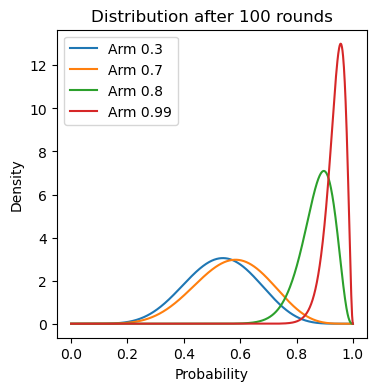

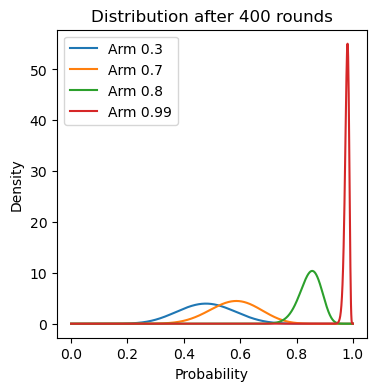

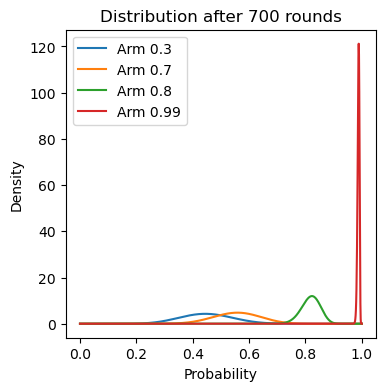

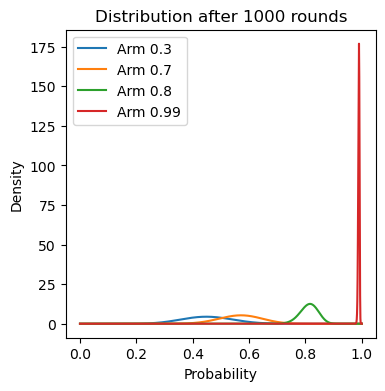

In [12]:
# Set the probability of winning for the three slot machines
p1, p2, p3, p4 = 0.3, 0.7, 0.8, 0.99 

# Create three bandits
bandits = [Bandit(p1), Bandit(p2), Bandit(p3), Bandit(p4)]
# Run upper confident bound algorithm
C = 0.7
rewards_ucb, regrets_ucb, pulls_ucb = upper_confident_bound(bandits, C, 100)
# Plot the distribution after 1000 rounds for upper confident bound
plot_distribution(bandits, 100)
rewards_ucb, regrets_ucb, pulls_ucb = upper_confident_bound(bandits, C, 400)
# Plot the distribution after 1000 rounds for upper confident bound
plot_distribution(bandits, 400)
rewards_ucb, regrets_ucb, pulls_ucb = upper_confident_bound(bandits, C, 700)
# Plot the distribution after 1000 rounds for upper confident bound
plot_distribution(bandits, 700)
rewards_ucb, regrets_ucb, pulls_ucb = upper_confident_bound(bandits, C, 1000)
# Plot the distribution after 1000 rounds for upper confident bound
plot_distribution(bandits, 1000)

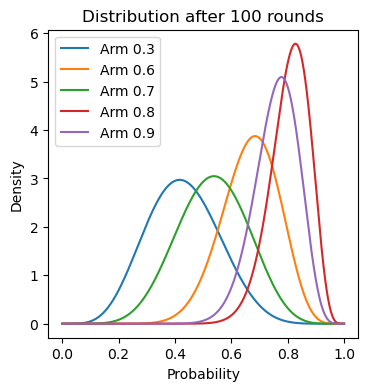

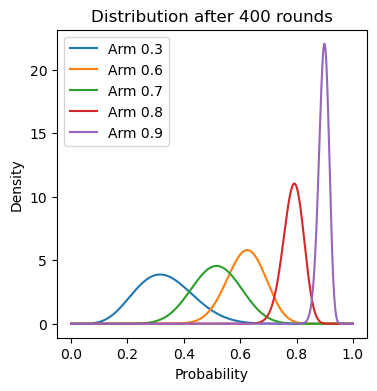

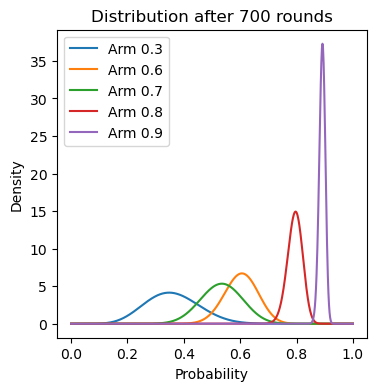

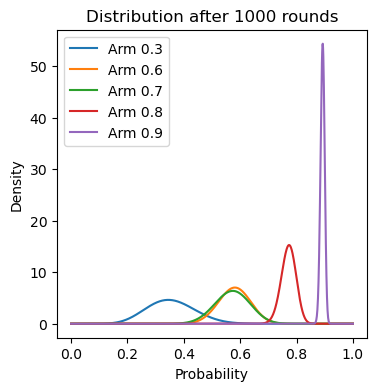

In [13]:
# Set the probability of winning for the three slot machines
p1, p2, p3, p4, p5 = 0.3, 0.6, 0.7, 0.8, 0.9

# Create three bandits
bandits = [Bandit(p1), Bandit(p2), Bandit(p3), Bandit(p4), Bandit(p5)]
# Run upper confident bound algorithm
C = 0.7
rewards_ucb, regrets_ucb, pulls_ucb = upper_confident_bound(bandits, C, 100)
# Plot the distribution after 1000 rounds for upper confident bound
plot_distribution(bandits, 100)
rewards_ucb, regrets_ucb, pulls_ucb = upper_confident_bound(bandits, C, 400)
# Plot the distribution after 1000 rounds for upper confident bound
plot_distribution(bandits, 400)
rewards_ucb, regrets_ucb, pulls_ucb = upper_confident_bound(bandits, C, 700)
# Plot the distribution after 1000 rounds for upper confident bound
plot_distribution(bandits, 700)
rewards_ucb, regrets_ucb, pulls_ucb = upper_confident_bound(bandits, C, 1000)
# Plot the distribution after 1000 rounds for upper confident bound
plot_distribution(bandits, 1000)

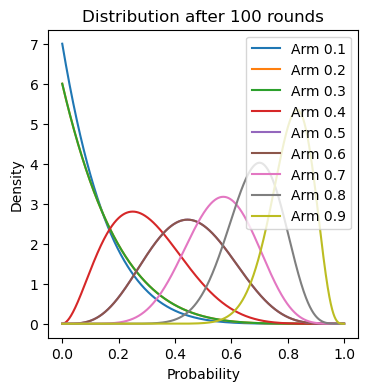

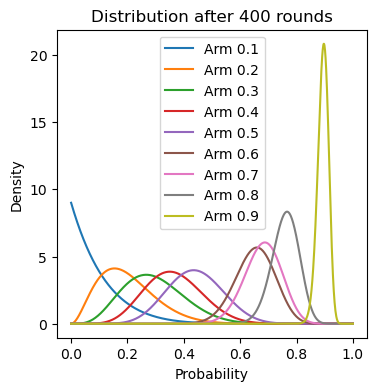

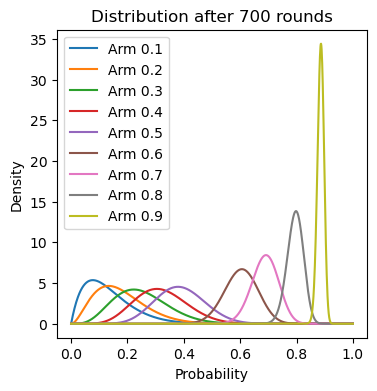

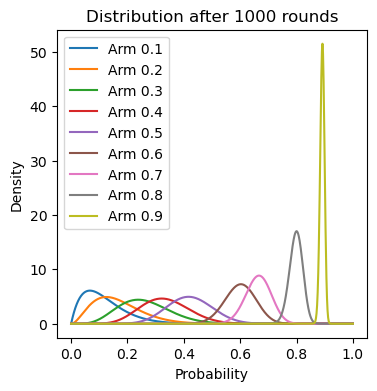

In [14]:
# Set the probability of winning for the three slot machines
p1, p2, p3, p4, p5, p6, p7, p8, p9 = 0.1, 0.2, 0.3,0.4, 0.5, 0.6, 0.7, 0.8, 0.9

# Create three bandits
bandits = [Bandit(p1), Bandit(p2), Bandit(p3), Bandit(p4), Bandit(p5), Bandit(p6), Bandit(p7), Bandit(p8), Bandit(p9)]
# Run upper confident bound algorithm
C = 0.7
rewards_ucb, regrets_ucb, pulls_ucb = upper_confident_bound(bandits, C, 100)
# Plot the distribution after 1000 rounds for upper confident bound
plot_distribution(bandits, 100)
rewards_ucb, regrets_ucb, pulls_ucb = upper_confident_bound(bandits, C, 400)
# Plot the distribution after 1000 rounds for upper confident bound
plot_distribution(bandits, 400)
rewards_ucb, regrets_ucb, pulls_ucb = upper_confident_bound(bandits, C, 700)
# Plot the distribution after 1000 rounds for upper confident bound
plot_distribution(bandits, 700)
rewards_ucb, regrets_ucb, pulls_ucb = upper_confident_bound(bandits, C, 1000)
# Plot the distribution after 1000 rounds for upper confident bound
plot_distribution(bandits, 1000)

當round次數夠多, 明顯感受到收斂程度更明顯了

# Thomson sampling

## arm4 vs arm5

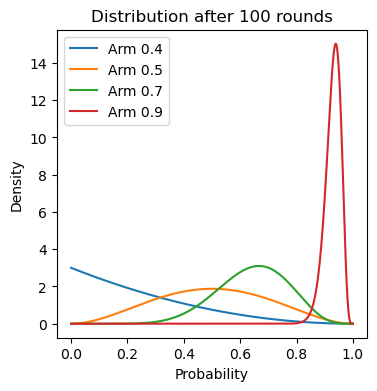

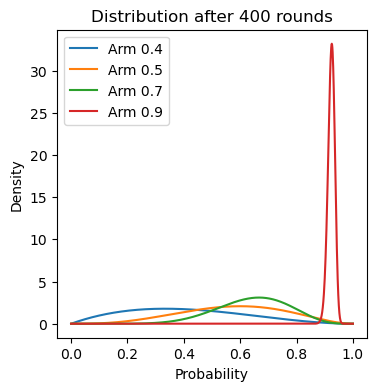

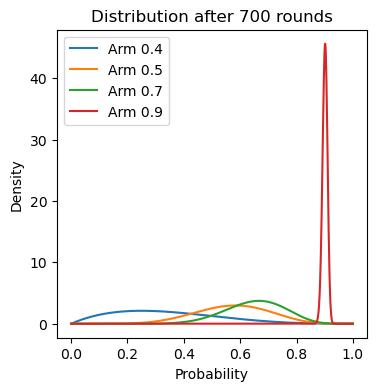

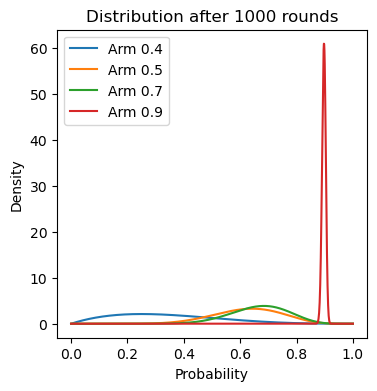

In [15]:
# Set the probability of winning for the three slot machines
p1, p2, p3 , p4= 0.4, 0.5, 0.7, 0.9

# Create three bandits
bandits = [Bandit(p1), Bandit(p2), Bandit(p3), Bandit(p4)]

# Run Thompson sampling algorithm
rewards_ts, regrets_ts, pulls_ts = thompson_sampling(bandits, 100)
# Plot the distribution after 1000 rounds for Thompson sampling
plot_distribution(bandits, 100)

rewards_ts, regrets_ts, pulls_ts = thompson_sampling(bandits, 400)
# Plot the distribution after 1000 rounds for Thompson sampling
plot_distribution(bandits, 400)

rewards_ts, regrets_ts, pulls_ts = thompson_sampling(bandits, 700)
# Plot the distribution after 1000 rounds for Thompson sampling
plot_distribution(bandits, 700)

rewards_ts, regrets_ts, pulls_ts = thompson_sampling(bandits, 1000)
# Plot the distribution after 1000 rounds for Thompson sampling
plot_distribution(bandits, 1000)

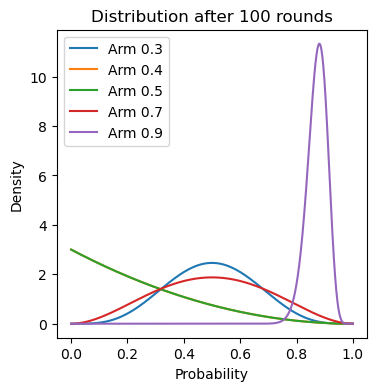

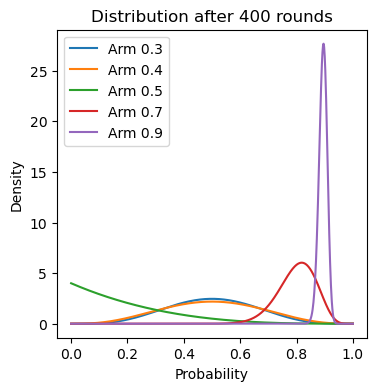

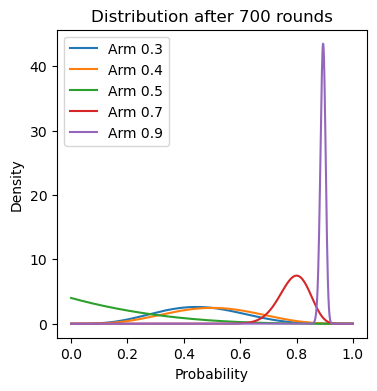

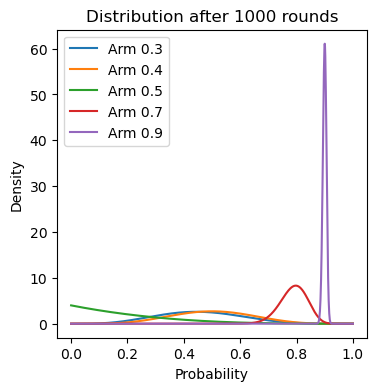

In [4]:
# Set the probability of winning for the three slot machines
p1, p2, p3 , p4, p5 = 0.3, 0.4, 0.5, 0.7, 0.9

# Create three bandits
bandits = [Bandit(p1), Bandit(p2), Bandit(p3), Bandit(p4), Bandit(p5)]

# Run Thompson sampling algorithm
rewards_ts, regrets_ts, pulls_ts = thompson_sampling(bandits, 100)
# Plot the distribution after 1000 rounds for Thompson sampling
plot_distribution(bandits, 100)

rewards_ts, regrets_ts, pulls_ts = thompson_sampling(bandits, 400)
# Plot the distribution after 1000 rounds for Thompson sampling
plot_distribution(bandits, 400)

rewards_ts, regrets_ts, pulls_ts = thompson_sampling(bandits, 700)
# Plot the distribution after 1000 rounds for Thompson sampling
plot_distribution(bandits, 700)

rewards_ts, regrets_ts, pulls_ts = thompson_sampling(bandits, 1000)
# Plot the distribution after 1000 rounds for Thompson sampling
plot_distribution(bandits, 1000)

## different probability

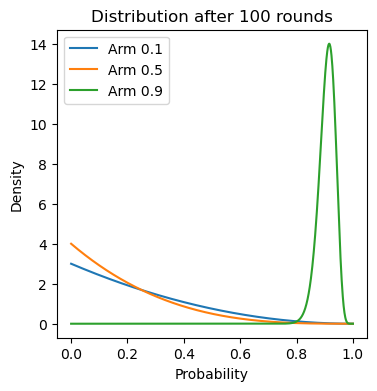

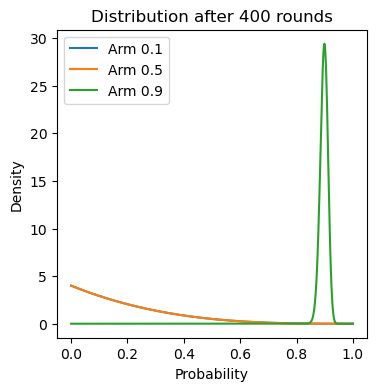

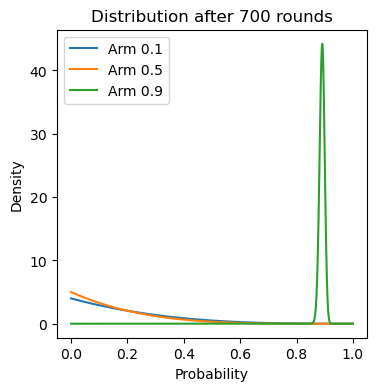

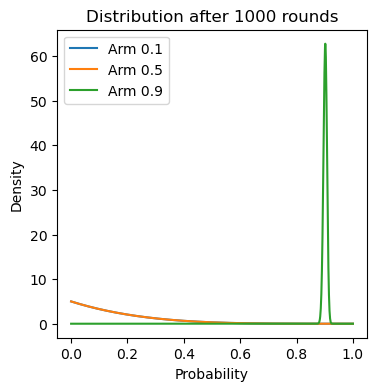

In [6]:
# Set the probability of winning for the three slot machines
p1, p2, p3 = 0.1, 0.5, 0.9

# Create three bandits
bandits = [Bandit(p1), Bandit(p2), Bandit(p3)]

# Run Thompson sampling algorithm
rewards_ts, regrets_ts, pulls_ts = thompson_sampling(bandits, 100)
# Plot the distribution after 1000 rounds for Thompson sampling
plot_distribution(bandits, 100)

rewards_ts, regrets_ts, pulls_ts = thompson_sampling(bandits, 400)
# Plot the distribution after 1000 rounds for Thompson sampling
plot_distribution(bandits, 400)

rewards_ts, regrets_ts, pulls_ts = thompson_sampling(bandits, 700)
# Plot the distribution after 1000 rounds for Thompson sampling
plot_distribution(bandits, 700)

rewards_ts, regrets_ts, pulls_ts = thompson_sampling(bandits, 1000)
# Plot the distribution after 1000 rounds for Thompson sampling
plot_distribution(bandits, 1000)

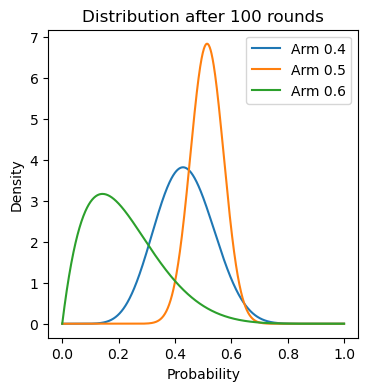

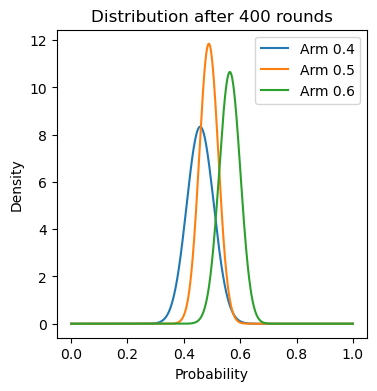

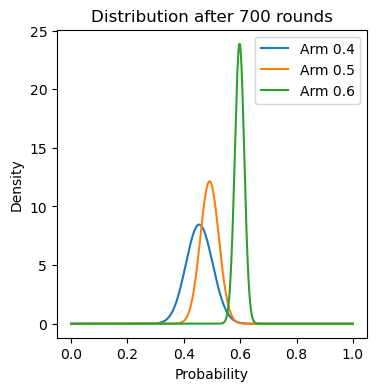

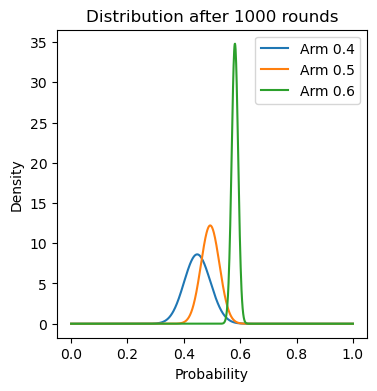

In [7]:
# Set the probability of winning for the three slot machines
p1, p2, p3 = 0.4, 0.5, 0.6

# Create three bandits
bandits = [Bandit(p1), Bandit(p2), Bandit(p3)]

# Run Thompson sampling algorithm
rewards_ts, regrets_ts, pulls_ts = thompson_sampling(bandits, 100)
# Plot the distribution after 1000 rounds for Thompson sampling
plot_distribution(bandits, 100)

rewards_ts, regrets_ts, pulls_ts = thompson_sampling(bandits, 400)
# Plot the distribution after 1000 rounds for Thompson sampling
plot_distribution(bandits, 400)

rewards_ts, regrets_ts, pulls_ts = thompson_sampling(bandits, 700)
# Plot the distribution after 1000 rounds for Thompson sampling
plot_distribution(bandits, 700)

rewards_ts, regrets_ts, pulls_ts = thompson_sampling(bandits, 1000)
# Plot the distribution after 1000 rounds for Thompson sampling
plot_distribution(bandits, 1000)